<a href="https://colab.research.google.com/github/sayan0506/DECA-implementation/blob/main/DECA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement DECA(Detailed Expression Capture and Animation)**

Notebook included pretrained model implementatio n from DECA git repository 

## GPU configuration check

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import subprocess
print(subprocess.getoutput('nvidia-smi'))

Sun Apr 18 14:43:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Check ffmpeg

In [2]:
print(subprocess.getoutput('ffmpeg'))

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## Clone Github DECA repo github 
Repo link: https://github.com/YadiraF/DECA

In [21]:
# clone git repo
!git clone https://github.com/YadiraF/DECA

Cloning into 'DECA'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 170 (delta 46), reused 128 (delta 31), pack-reused 17
Receiving objects: 100% (170/170), 18.45 MiB | 16.75 MiB/s, done.
Resolving deltas: 100% (46/46), done.


## Install requirements

Create DECA directory

In [22]:
%cd /content/BFM_to_FLAME/DECA

/content/BFM_to_FLAME/DECA


**Install dependencies**

In [23]:
!pip install -r requirements.txt

     |████████████████████████████████| 645kB 7.5MB/s 
     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 5.9MB 55.5MB/s 
  Created wheel for face-alignment: filename=face_alignment-1.3.3-py2.py3-none-any.whl size=27562 sha256=d2b68bad6b02e34545366bd1a66499101b0be535bf4f03c9e113f4911c72de29
  Stored in directory: /root/.cache/pip/wheels/76/1b/f7/7c61075544ea85a866ec89d1b455b123dad18c13361c02ff2b
Successfully built face-alignment
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


**Adding the DECA path as pythonpath**

In [24]:
!export PYTHONPATH=/content/BFM_to_FLAME/DECA:$PYTHONPATH

Install pytorch3d

In [25]:
!pip install pytorch3d

     |████████████████████████████████| 30.0MB 103kB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210415-cp37-none-any.whl size=59310 sha256=bf6f3b47e512a6e592f8ed8cc5985a97da54b1c59526a5976280920cb479ae51
  Stored in directory: /root/.cache/pip/wheels/a3/51/39/6bce45bcb56ba30ed7ea1386ddc22bb5853fa9887c080145e8
Successfully built fvcore


**Mount drive**

Mounting Drive folder where the models are stored.

Path: **'/content/drive/MyDrive/3D vision'**

In [26]:
import zipfile
import os
import shutil
from matplotlib import pyplot as plt
#from PIL import Image
#import ipython
from IPython.display import Image

**Defining unzipping function**

In [27]:
def unzip(zip_file, content_dir):
  if not os.path.isdir(content_dir):
    os.mkdir(content_dir)

  # unzipping
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(content_dir)


**Load Models**

1. Unzip Flame model
2. Load DECA trained model

* Copying unzipped Flame(2020) Model file (generic_model.pkl) to /.data folder
* Similarly copy zip trained DECA model weights to /.data folder in DECA directory

In [28]:
from google.colab import drive

# unmount existing drive
drive.flush_and_unmount()

In [29]:
# remount new drve
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# content directory
content_dir_2 = '/content/Flame_model_2020'

# zip
zip_file_2 = '/content/drive/MyDrive/3D vision/FLAME2020.zip' 

# unzipping FLAME2020 zip
unzip(zip_file_2, content_dir_2)

Copying generic_model.pkl to ./data

In [35]:
data_folder = '/content/BFM_to_FLAME/DECA/data'

In [36]:
shutil.copy('/content/Flame_model_2020/generic_model.pkl',data_folder)

'/content/BFM_to_FLAME/DECA/data/generic_model.pkl'

Copying DECA model to ./data

In [38]:
shutil.copy('/content/drive/MyDrive/3D vision/deca_model.tar',data_folder)

'/content/BFM_to_FLAME/DECA/data/deca_model.tar'

## Reconstructing the Demo

1. 3D mesh reconstruction 
2. COarse shape
3. Detail shape 
4. Albedo map
5. Displays UV displacement map

Input path : /content/Input_img

Output path: /content/output_img

File structure:


Copy converted '/content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz' to '/content/BFM_to_FLAME/DECA/data'

In [43]:
shutil.copy('/content/BFM_to_FLAME/output/FLAME_albedo_from_BFM.npz', '/content/BFM_to_FLAME/DECA/data')

'/content/BFM_to_FLAME/DECA/data/FLAME_albedo_from_BFM.npz'

In [44]:
# mention input image path
# output result path
# --saveKpt saves the 2D and 3D face landmarks 
!python demos/demo_reconstruct.py -i /content/Input_img -s /content/output_img --useTex True --saveKpt True --saveDepth True --saveObj True --saveImages True

total 1 images
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
tcmalloc: large alloc 1251999744 bytes == 0x56053777a000 @  0x7fdd5a5541e7 0x7fdd4e5f446e 0x7fdd4e644c2b 0x7fdd4e5f7ce8 0x5604acdd1c25 0x5604acd928e9 0x5604ace06ade 0x5604ace00b0e 0x5604acd9377a 0x5604ace0286a 0x5604acd9572b 0x5604acdd65e9 0x5604acdd655c 0x5604ace79e59 0x5604ace01fad 0x5604ace00e0d 0x5604acd93e11 0x5604acdd4d39 0x5604acdd1c84 0x5604acd927f2 0x5604ace05d75 0x5604ace00e0d 0x5604acd9377a 0x5604ace01c9e 0x5604ace00b0e 0x5604acd9402c 0x5604acdd4d39 0x5604acdd1c84 0x5604acd928e9 0x5604ace06ade 0x5604acd9369a
trained model found. load /content/BFM_to_FLAME/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/BFM_to_FLAME/DECA/data/template.mtl
  warnings.warn(f"

## Output Visualization

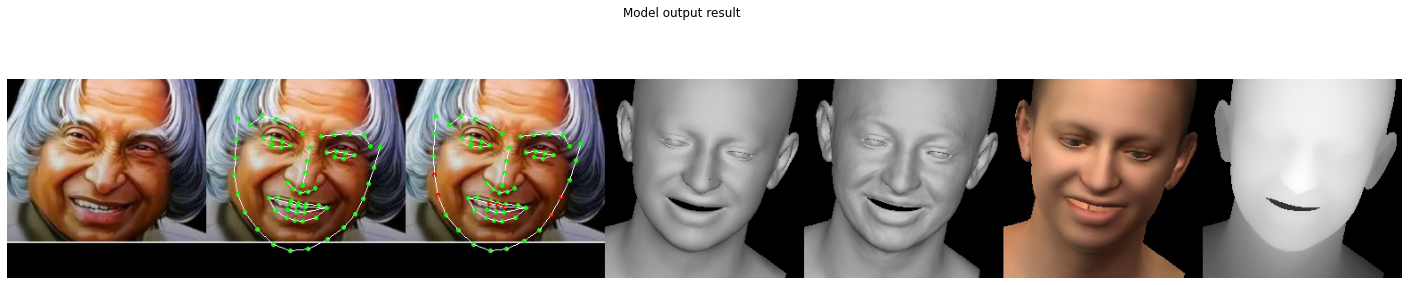

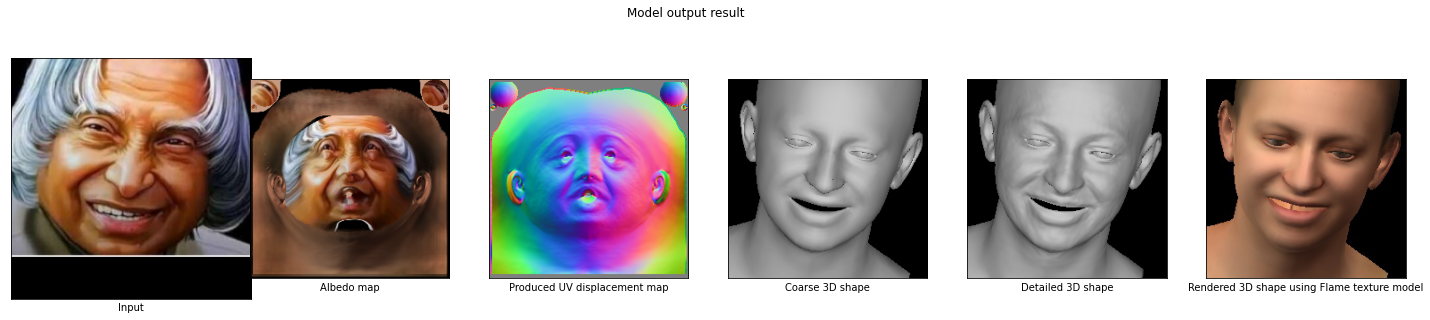

In [48]:
fig1 = plt.figure(figsize=(25,5))
fig1.suptitle('Model output result')
im_result = plt.imread('/content/output_img/missile_man_vis.jpg')
plt.imshow(im_result)
plt.axis('off')


fig2 = plt.figure(figsize=(25,5))
fig2.suptitle('Model output result')
im_albedo = plt.imread('/content/output_img/missile_man/missile_man.png')
im_input = plt.imread('/content/output_img/missile_man/missile_man_inputs.jpg')
im_uv = plt.imread('/content/output_img/missile_man/missile_man_normals.png')
im_coarse = plt.imread('/content/output_img/missile_man/missile_man_shape_images.jpg')
im_detail = plt.imread('/content/output_img/missile_man/missile_man_shape_detail_images.jpg')
im_rendered = plt.imread('/content/output_img/missile_man/missile_man_rendered_images.jpg')

fig2.add_subplot(1,5,1)
plt.imshow(im_input)
plt.xticks([])
plt.yticks([])
plt.xlabel('Input')

fig2.add_subplot(1,6,2)
plt.imshow(im_albedo)
plt.xticks([])
plt.yticks([])
plt.xlabel('Albedo map')

fig2.add_subplot(1,6,3)
plt.imshow(im_uv)
plt.xticks([])
plt.yticks([])
plt.xlabel('Produced UV displacement map')

fig2.add_subplot(1,6,4)
plt.imshow(im_coarse)
plt.xticks([])
plt.yticks([])
plt.xlabel('Coarse 3D shape')

fig2.add_subplot(1,6,5)
plt.imshow(im_detail)
plt.xticks([])
plt.yticks([])
plt.xlabel('Detailed 3D shape')

fig2.add_subplot(1,6,6)
plt.imshow(im_rendered)
plt.xticks([])
plt.yticks([])
plt.xlabel('Rendered 3D shape using Flame texture model')


plt.show()

Note: File structures

* 2d and 3d keypoints are stored in .txt file (Green marked keypoints are perfectly detected, but red marked are interpolated based on neighborhoods)
* .mtl, .obj file contains extracted information from input images, helps to generate 3D mesh, can be opened in mesh lab

## Expression transfer

In [49]:
!python demos/demo_transfer.py -i /content/Input_img -s /content/Expression_transfer --useTex True

total 1 images
total 1 images
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
tcmalloc: large alloc 1251999744 bytes == 0x56436a4e8000 @  0x7fe37f6a81e7 0x7fe37376946e 0x7fe3737b9c2b 0x7fe37376cce8 0x5642dea17c25 0x5642de9d88e9 0x5642dea4cade 0x5642dea46b0e 0x5642de9d977a 0x5642dea4886a 0x5642de9db72b 0x5642dea1c5e9 0x5642dea1c55c 0x5642deabfe59 0x5642dea47fad 0x5642dea46e0d 0x5642de9d9e11 0x5642dea1ad39 0x5642dea17c84 0x5642de9d87f2 0x5642dea4bd75 0x5642dea46e0d 0x5642de9d977a 0x5642dea47c9e 0x5642dea46b0e 0x5642de9da02c 0x5642dea1ad39 0x5642dea17c84 0x5642de9d88e9 0x5642dea4cade 0x5642dea46e0d
trained model found. load /content/BFM_to_FLAME/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/BFM_to_FLAME/DECA/data/template.mtl
  w

## Creating expression transfer gif

In [21]:
!python demos/demo_teaser.py -i /content/Input_img -s /content/Expression_transfer

total 1 images
total 9 images
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
fc.weight  not available in reconstructed resnet
fc.bias  not available in reconstructed resnet
creating the FLAME Decoder
trained model found. load /content/DECA/data/deca_model.tar
/usr/local/lib/python3.7/dist-packages/pytorch3d/io/obj_io.py:457: UserWarning: Mtl file does not exist: /content/DECA/data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align

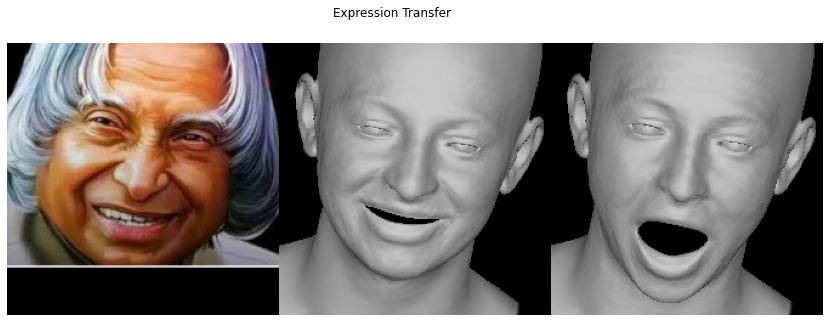

In [22]:
# expression transfer result
fig = plt.figure(figsize = (25,5))
fig.suptitle('Expression Transfer')
plt.imshow(plt.imread('/content/Expression_transfer/missile_man_animation.jpg'))
plt.axis('off')
plt.show()

## Expression transfer animation demo

In [23]:
gif_path = '/content/Expression_transfer/teaser.gif'

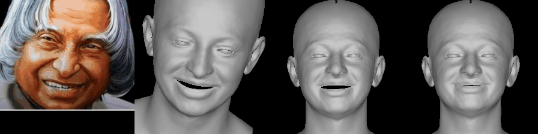

In [24]:
with open(gif_path, 'rb') as file:
  display(Image(file.read()))

## Convert from Basel Face Model (BFM) to FLAME

Git repo: https://github.com/TimoBolkart/BFM_to_FLAME

In [3]:
!git clone https://github.com/TimoBolkart/BFM_to_FLAME.git

Cloning into 'BFM_to_FLAME'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 97 (delta 32), reused 48 (delta 6), pack-reused 0
Unpacking objects: 100% (97/97), done.


Install requirements

In [4]:
!pip install numpy==1.19.4
!pip install h5py==3.1.0
!pip install chumpy==0.70 
!pip install opencv-python==4.4.0.46

     |████████████████████████████████| 14.5MB 190kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


     |████████████████████████████████| 4.0MB 8.5MB/s 
ERROR: tensorflow 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
  Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-cp37-none-any.whl size=58291 sha256=9c17dc5e40087bfd5f07be93f37fd74d0618821b452e500759c6ffd718852cee
  Stored in directory: /root/.cache/pip/wheels/0a/73/91/b8dbef9746a907c8c008fc194a9691224ca3371b55f16f1dbd
Successfully built chumpy
     |████████████████████████████████| 49.5MB 61kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


Create texture model

Download BFM 2017 (i.e. 'model2017-1_bfm_nomouth.h5') from here and place it in the model folder. Download inpainting masks from here and place it in the data folder.

MOunt drive to access model files

In [9]:
BFM_model_path = '/content/BFM_to_FLAME/model'

Copy model2017-1_bfm_nomouth.h5 to /model folder

In [12]:
shutil.copy('/content/drive/MyDrive/3D vision/model2017-1_bfm_nomouth.h5',BFM_model_path)

'/content/BFM_to_FLAME/model/model2017-1_bfm_nomouth.h5'

Copy inpainting mask to data folder

In [13]:
bfm_data_path = '/content/BFM_to_FLAME/data'

In [14]:
shutil.copy('/content/drive/MyDrive/3D vision/mask_inpainting.npz',bfm_data_path)

'/content/BFM_to_FLAME/data/mask_inpainting.npz'

In [15]:
!export PYTHONPATH=/content/DECA/BFM_to_FLAME:$PYTHONPATH

In [18]:
%cd /content/BFM_to_FLAME

/content/BFM_to_FLAME


In [19]:
!pwd

/content/BFM_to_FLAME


outputs a 'FLAME_albedo_from_BFM.npz' in the output folder. This file can be used with several FLAME-based repositories like TF_FLAME or FLAME photometric optimization.

In [20]:
!python col_to_tex.py

Conversion started......
tcmalloc: large alloc 1251999744 bytes == 0x55cfcb254000 @  0x7fc2267b7001 0x7fc21a87654f 0x7fc21a8c6b08 0x7fc21a8cac07 0x7fc21a969063 0x55cf7fbaa050 0x55cf7fba9de0 0x55cf7fc1e244 0x55cf7fbab69a 0x55cf7fc19a45 0x55cf7fbab69a 0x55cf7fc19a45 0x55cf7fc18b0e 0x55cf7fc18813 0x55cf7fce2592 0x55cf7fce290d 0x55cf7fce27b6 0x55cf7fcba103 0x55cf7fcb9dac 0x7fc22559fbf7 0x55cf7fcb9c8a
Conversion finished


In [ ]:
%cd DECA